In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

# IF Data

In [2]:
if_data = pd.read_csv('./Blade Life/IF Analysis.csv')

In [3]:
if_data = if_data.drop(['Unnamed: 0'], axis=1)

In [4]:
if_data.head()

,Time,Time Elapsed,Month,CutMotorTorque,CutLagerror,CutActualPosition,CutActualSpeed,FilmActualPosition,FilmActualSpeed,FilmLagError,VAXSpeed,Mode,Anomaly,Anomaly Score
0,2000/01/04 18:41:48.008,0.008,1,0.199603,0.027420,628392628,-920.104980,5298555,2441.235352,0.899543,1379.999756,1,0,0.128525
1,2000/01/04 18:41:48.011,0.012,1,0.281624,0.002502,628392625,-937.271118,5298565,2453.819092,0.874072,1379.999756,1,0,0.133237
2,2000/01/04 18:41:48.015,0.016,1,0.349315,-0.018085,628392621,-951.004028,5298575,2476.469727,0.879806,1379.999756,1,0,0.130823
3,2000/01/04 18:41:48.019,0.020,1,0.444450,-0.054680,628392617,-1019.668579,5298585,2501.637207,0.837500,1379.999756,1,0,0.102055
4,2000/01/04 18:41:48.023,0.024,1,0.480923,-0.042770,628392613,-1023.101807,5298595,2519.254395,0.905347,1379.999756,1,0,0.109986


In [5]:
month1 = if_data[if_data['Month']==1]
month2 = if_data[if_data['Month']==2]
month3 = if_data[if_data['Month']==3]
month4 = if_data[if_data['Month']==4]
month5 = if_data[if_data['Month']==5]
month6 = if_data[if_data['Month']==6]
month7 = if_data[if_data['Month']==7]
month8 = if_data[if_data['Month']==8]
month9 = if_data[if_data['Month']==9]
month10 = if_data[if_data['Month']==10]
month11 = if_data[if_data['Month']==11]
month12 = if_data[if_data['Month']==12]
month_data = [month1, month2, month3, month4, month5, month6, month7, month8, month9, month10, month11, month12]

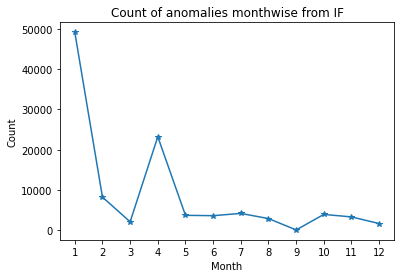

In [8]:
anomalies = []
months = [1,2,3,4,5,6,7,8,9,10,11,12]
for d in month_data:
    a = d['Anomaly']
    val = a.value_counts()[1]
    anomalies.append(val)

plt.plot(months,anomalies, '*-')
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of anomalies monthwise from IF')
plt.show()

# New Blade

<p>Here we perform PCA and use PCA1 to find MSE b/w new blade and each of the 519 files. Then we use a threshold to make a boolean variable to indicate if each file represents a new blade or not</p>

In [9]:
new_blade = pd.read_csv('./Blade New/Data/NewBlade001.csv')

In [10]:
new_blade = new_blade.drop(['Timestamp'], axis=1)

In [11]:
scaler = MinMaxScaler() 
scaled = scaler.fit_transform(new_blade)
new_blade = pd.DataFrame(scaled, columns = new_blade.columns)

In [12]:
new_blade.rename(columns={"pCut Motor: Torque":"CutMotorTorque",
                         " pCut CTRL Position controller: Lag error": "CutLagError",
                         " pCut CTRL Position controller: Actual position" :"CutActualPosition",
                         " pCut CTRL Position controller: Actual speed":"CutActualSpeed",
                         " pSvolFilm CTRL Position controller: Actual position":"FilmActualPosition",
                         " pSvolFilm CTRL Position controller: Actual speed":"FilmActualSpeed",
                         " pSvolFilm CTRL Position controller: Lag error":"FilmLagError"},
                inplace=True)

In [13]:
new_blade.head()

,CutMotorTorque,CutLagError,CutActualPosition,CutActualSpeed,FilmActualPosition,FilmActualSpeed,FilmLagError
0,0.752139,0.594529,0.018434,0.211568,0.0,0.004825,0.003281
1,0.760143,0.592932,0.018434,0.215373,0.0,0.002413,0.001641
2,0.751100,0.599321,0.018434,0.210046,0.0,0.007238,0.000000
3,0.752248,0.600919,0.018434,0.208524,0.0,0.002413,0.001641
4,0.745639,0.602516,0.018434,0.210046,0.0,0.003619,0.003281


In [14]:
files = []
for r, d, f in os.walk('./Blade Life/Data'):
   for item in f:
    files.append(os.path.join(r, item))

In [16]:
pca = PCA(n_components = 7)
principalComponents = pca.fit_transform(new_blade)
new_blade_pca = pd.DataFrame(data = principalComponents, columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7'])

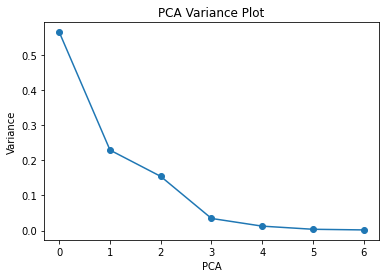

In [17]:
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.xlabel('PCA')
plt.ylabel('Variance')
plt.title('PCA Variance Plot')
plt.show()

In [18]:
compare_new_pca = pd.DataFrame(columns = ['File', 'Mode', 'Month', 'PCA1', 'PCA2', 'PCA3'])
compare_new_pca 

,File,Mode,Month,PCA1,PCA2,PCA3


In [19]:
# let us consider PCA1, PCA2, PCA3
for file in files:
    
    df = pd.read_csv(file)
    df.rename(columns={"timestamp":"Time Elapsed",
                         "pCut::Motor_Torque":"CutMotorTorque",
                         "pCut::CTRL_Position_controller::Lag_error": "CutLagError",
                         "pCut::CTRL_Position_controller::Actual_position" :"CutActualPosition",
                         "pCut::CTRL_Position_controller::Actual_speed":"CutActualSpeed",
                         "pSvolFilm::CTRL_Position_controller::Actual_position":"FilmActualPosition",
                         "pSvolFilm::CTRL_Position_controller::Actual_speed":"FilmActualSpeed",
                         "pSvolFilm::CTRL_Position_controller::Lag_error":"FilmLagError",
                         "pSpintor::VAX_speed":"VAXSpeed"},
                inplace=True)
    scaler = MinMaxScaler() 
    scaled = scaler.fit_transform(df)
    df = pd.DataFrame(scaled, columns = df.columns)
    
    principal_components = pca.fit_transform(df)
    df_pca = pd.DataFrame(data = principal_components, columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7'])
    
    s = str(file)
    month = s[18:20]
    mode = s[39]
    fileno = s[31:34]
    
    mse_values = []
    for i in range(4):
        val = mean_squared_error(df_pca.iloc[:,i], new_blade_pca.iloc[:,i])
        mse_values.append(val)
    compare_new_pca = compare_new_pca.append({'File':fileno, 'Mode':mode, 'Month':month, 
                                              'PCA1':mse_values[0], 'PCA2':mse_values[1], 
                                               'PCA3':mse_values[2]}, ignore_index=True)


In [20]:
compare_new_pca

,File,Mode,Month,PCA1,PCA2,PCA3
0,000,1,01,1.178959,0.093693,0.077191
1,001,1,01,0.141376,0.373572,0.057997
2,002,1,01,0.075227,0.246026,0.075594
3,003,1,01,0.959108,0.246596,0.115863
4,004,1,01,0.902167,0.303740,0.133356
...,...,...,...,...,...,...
514,514,1,12,0.948770,0.321167,0.115728
515,515,2,12,0.188382,0.305220,0.092025
516,516,2,12,0.199689,0.282657,0.097624
517,517,2,12,0.024408,0.385584,0.106206


In [21]:
compare_new_pca.describe()

,PCA1,PCA2,PCA3
count,519.000000,519.000000,519.000000
mean,0.487514,0.307957,0.129250
std,0.358663,0.061689,0.042013
min,0.003613,0.034887,0.050309
25%,0.105282,0.274396,0.105848
50%,0.463075,0.305500,0.121144
75%,0.829873,0.364568,0.146578
max,1.419605,0.512965,0.304913


In [22]:
compare_new_pca['Is New'] = 0

In [23]:
compare_new_pca.head()

,File,Mode,Month,PCA1,PCA2,PCA3,Is New
0,000,1,01,1.178959,0.093693,0.077191,0
1,001,1,01,0.141376,0.373572,0.057997,0
2,002,1,01,0.075227,0.246026,0.075594,0
3,003,1,01,0.959108,0.246596,0.115863,0
4,004,1,01,0.902167,0.303740,0.133356,0


In [24]:
# now let us consideronly PCA1 for further analysis
# we will now create a new column to indicate if the file is similar to the new blade or not
# we will use the threshold of std=0.358 i.e if error is < threshold it is accepted as new blade

for i in compare_new_pca.index:
    x = compare_new_pca['PCA1'][i]
    if x < 0.358:
        compare_new_pca['Is New'][i] = 1

<ipython-input-24-bcc78ada43f0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare_new_pca['Is New'][i] = 1


In [25]:
# grouping it monthwise
month1 = compare_new_pca[compare_new_pca['Month']=='01']
month2 = compare_new_pca[compare_new_pca['Month']=='02']
month3 = compare_new_pca[compare_new_pca['Month']=='03']
month4 = compare_new_pca[compare_new_pca['Month']=='04']
month5 = compare_new_pca[compare_new_pca['Month']=='05']
month6 = compare_new_pca[compare_new_pca['Month']=='06']
month7 = compare_new_pca[compare_new_pca['Month']=='07']
month8 = compare_new_pca[compare_new_pca['Month']=='08']
month9 = compare_new_pca[compare_new_pca['Month']=='09']
month10 = compare_new_pca[compare_new_pca['Month']=='10']
month11 = compare_new_pca[compare_new_pca['Month']=='11']
month12 = compare_new_pca[compare_new_pca['Month']=='12']
month_data = [month1, month2, month3, month4, month5, month6, month7, month8, month9, month10, month11, month12]

In [26]:
month1['Is New'].value_counts()

0    60
1    35
Name: Is New, dtype: int64

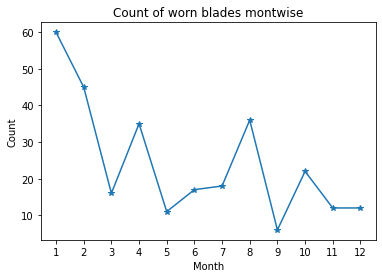

In [31]:
counts = []
totals = [len(x) for x in month_data]
months = [1,2,3,4,5,6,7,8,9,10,11,12]
for d in month_data:
    a = d['Is New']
    val = a.value_counts()[0]
    counts.append(val)

plt.plot(months,counts, '*-')
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of worn blades montwise')
plt.show()